# Silatra CNN Model Testing

The model was trained using Kaggle Kernel. In this seperate notebook I am just testing the results of this trained model on an unseen test dataset.

This indicated an accuracy of 98.14 %

Note: The model was trained using TF 2.2 on Kaggle. However, on my local machine, I am using TF 1.15.

In [23]:
import tensorflow as tf
import keras
import os
import shutil
from tqdm import tqdm
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [24]:
img_path = 'input/indian-sign-language-translation-letters-n-digits/'

for class1 in os.listdir(img_path):
    num_images = len(os.listdir(os.path.join(img_path,class1)))
    for (n,filename) in enumerate(os.listdir(os.path.join(img_path,class1))):
        img = os.path.join(img_path,class1,filename)
        if not os.path.exists('test/'+class1+'/'):
            os.makedirs('test/'+class1+'/')
            os.makedirs('train/'+class1+'/')
            os.makedirs('val/'+class1+'/')
        if n < int(0.1 * num_images):
            shutil.copy(img,'test/'+class1+'/'+filename)
        elif n < int(0.8 * num_images):
            shutil.copy(img,'train/'+class1+'/'+filename)
        else:
            shutil.copy(img,'val/'+class1+'/'+filename)

In [25]:
def load_data(image_dir):
    images = []
    y = []
    classNum = 0
    for class1 in tqdm(sorted(os.listdir(image_dir))):
        for file_name in os.listdir(os.path.join(image_dir,class1)):
            images.append(cv2.resize(cv2.cvtColor(cv2.imread(os.path.join(image_dir,class1,file_name)),cv2.COLOR_BGR2RGB),(224,224)))
            y.append(classNum)
        classNum += 1
    print(f'Loaded {len(images)} images from {image_dir} directory')
    images = np.array(images)
    y = np.array(y)
    return images,y

In [26]:
test_images,test_labels = load_data('test/')

100%|██████████| 33/33 [00:04<00:00,  8.13it/s]


Loaded 1074 images from test/ directory


In [27]:
model = load_model('Silatra_HandPoses_CNN_27May20.h5')

In [28]:
preds = model.predict(test_images).argmax(axis=1)

In [29]:
test_labels.shape,preds.shape

((1074,), (1074,))

In [30]:
model.evaluate(test_images,OneHotEncoder().fit_transform(test_labels.reshape(-1, 1)))

1074/1074 [==============================] - 10s 10ms/sample - loss: 12.6313 - acc: 0.9814


[12.63131963918107, 0.981378]

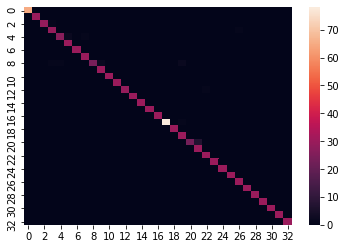

In [31]:
sns.heatmap(confusion_matrix(test_labels,preds))